In [8]:
import scipy 
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse import csr_matrix

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


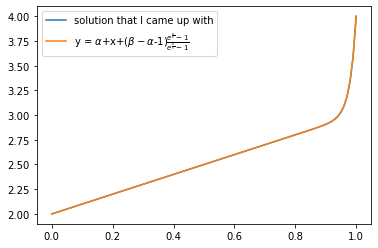

In [2]:
def solver(N, h,eps, a,b):
    #setting variables
    A = np.zeros((N+1,N+1))
    A[0][0], A[-1][-1] = 1,1

    #chaing the values in A
    for i in range(1, N):
        A[i][i-1] = (eps/h)+(1/2) 
        A[i][i] = (-eps/h)+(-eps/h)
        A[i][i+1] = (eps/h)-(1/2)

    #getting phis
    phi = np.ones(N+1).T*(-h)
    phi[0],phi[-1] = a,b

    #Now, we apply to Ax = b
    answer = np.linalg.solve(A, phi)

    return answer

#setting the variables
a = 2
b = 4
eps = .02
N = 100
x,h = np.linspace(0,1,N+1,retstep = True)
y = a+x+(b-a-1)*(np.exp(x/eps)-1)/(np.exp(1/eps)-1)

answer = solver(N,h,eps, a,b)

#plotting
plt.plot(x, answer, label = "solution that I came up with")
plt.plot(x, y, label = r"y = $\alpha$+x+($\beta-\alpha$-1)$\frac{e^{\frac{x}{\epsilon}}-1}{e^{\frac{x}{\epsilon}}-1}$")


plt.legend()
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

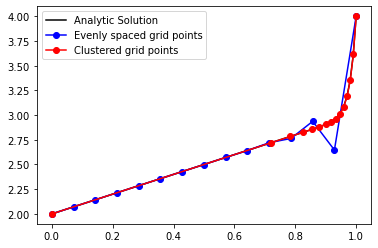

In [11]:
N = 100
x,h = np.linspace(0,1,N+1,retstep = True)
y = a+x+(b-a-1)*(np.exp(x/eps)-1)/(np.exp(1/eps)-1)
even_grid,h = np.linspace(0,1,15,retstep =True)
even_h = np.ones(14)*h
clustered_grid = np.linspace(0,1,15)**(1./8)
clustered_h = [clustered_grid[i+1] -clustered_grid[i] for i in range(len(clustered_grid)-1)]

#setting the variables
a = 2
b = 4
eps = .02
N = 14

def h_solver(N, h,eps, a,b):
    #setting variables
#     A = np.zeros((N+1,N+1))
    A = scipy.sparse.lil_matrix((N+1,N+1))
    A[0,0], A[-1,-1] = 1,1

    #chaing the values in A
    for i in range(1, N):
        A[i,i-1] = (eps/h[i-1])+(1/2) 
        A[i,i] = (-eps/h[i-1])+(-eps/h[i])
        A[i,i+1] = (eps/h[i])-(1/2)
    
    A = csr_matrix(A)

    #getting phis
    phi = np.ones(N+1).T
    for i in range(1, N):
        phi[i] = -(h[i-1]+h[i])/2
    phi[0],phi[-1] = a,b

    #Now, we apply to Ax = b
    answer = spsolve(A, phi)
    return answer

even_answer = h_solver(N, even_h,eps, a,b)
clustered_answer = h_solver(N,clustered_h,eps, a,b)

#plotting
plt.plot(x, y, color = 'black', label = "Analytic Solution")
plt.plot(even_grid, even_answer,'o-',color = 'blue',label = "Evenly spaced grid points")
plt.plot(clustered_grid, clustered_answer,'o-',color = 'red',label = "Clustered grid points")

plt.legend()
plt.show()

# Problem 3

Solve (11.5) with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

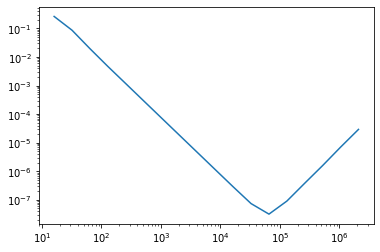

In [12]:
#setting the variables
a = 2
b = 4
eps = .02
errors = []

N = [2**i for i in range(4, 22)]
for n in N:
    x,h = np.linspace(0,1,n+1,retstep = True)
    even_h = np.ones(n)*h
    y = a+x+(b-a-1)*(np.exp(x/eps)-1)/(np.exp(1/eps)-1)
    
    answer = h_solver(n, even_h,eps, a,b)
    errors.append(max(abs(y - answer)))

plt.loglog(N, errors)
plt.show()